<a href="https://colab.research.google.com/github/majharul/ML_Data_Science/blob/master/forcast_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This section we have imported required library which would be necessary in this  project**
This project will predict the seles of number of cars in certain year.
The dataset contain data of around 17 years seles of different cars. Lets say The mode A to model P. Individual selling amount has been given , We need to predict using time series about the selling amount in the near future.
*we will be using Facebook Prophet library to visualize and predict the data aka seles of number of cars of different model in terms of Years. So lets get started

In [0]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import read_csv

import warnings
warnings.filterwarnings('ignore')


from scipy import stats
import statsmodels.api as sm


**Importing data from CSV file , which is in my drive

In [0]:
dt=pd.read_csv('/content/drive/My Drive/Colab Notebooks/product_demand/data.csv',parse_dates=['Items'])
dt.head()



,Unnamed: 0,Items,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,total mean,industrial product,food and drink,textile goods,Wood and wood products,"Pulp, paper and paper products",chemical products,petroleum and coal products,plastic product,Ceramics and stone products,Steel,nonferrous metal,Metal Products,general purpose equipment,production equipment,business equipment,electronic components and devices,electrical equipment,information and communication equipment,transportation equipment,Other industrial products,"agricultural, forestry and fishery products",...,software development,Information processing and provision services,Newspapers and Publications,newspaper,publishing,lease and rental,Leasing,Rental,advertising,television advertising,newspaper advertisement,magazine advertising,insert advertisement,Internet advertising,Other Advertisements,services,Sewage and waste treatment,sewerage,waste disposal,automobile maintenance and machine repair,automobile maintenance,machine repair,Professional Services,Legal and accounting services,Other Specialized Services,technical service,civil engineering and construction services,Employment placement and worker dispatch services,Worker Dispatch Service,Other Services,Building Services,guard,Laundry,Freight Transportation JR Freight Company (Container),Cargo transportation Air cargo export value,Cargo transportation Air cargo import value,Passenger transport Airlines Domestic flights,Passenger transport Airlines International,Passenger transport,Passenger transport Number of visitors to Japan
0,0,2000-01-01,19110,12004,19689,14593,1511,7147,5376,123,322,9732,5399,17506,24420,2329,4193,356,97.5,99.5,86.9,86.2,83.0,86.6,92.0,51.2,94.0,89.9,65.9,56.7,83.4,92.1,100.1,113.9,212.1,123.9,379.3,107.9,101.8,96.9,...,108.9,107.1,96.6,98.5,95.7,183.0,196.2,134.3,106.3,87.4,135.1,116.0,102.7,157.5,107.0,106.0,85.2,88.0,84.3,103.8,109.2,100.8,99.8,97.5,105.3,124.7,127.9,101.2,101.2,114.6,121.2,107.7,104.4,1446,1169.072,853.813,6667,1430,1229,336
1,1,2000-02-01,27910,16816,28629,20125,2030,10953,7079,216,509,13420,7113,23355,31667,3274,5511,478,97.5,99.4,87.0,87.1,83.1,86.5,92.0,51.3,93.9,89.8,66.0,57.1,83.3,92.0,100.0,113.9,210.9,123.4,376.3,107.9,101.8,99.4,...,110.4,107.1,96.6,98.5,95.7,181.7,194.6,133.9,109.4,95.5,135.5,116.9,102.7,157.5,107.0,106.0,85.3,89.3,84.1,103.7,109.1,100.8,99.8,97.5,105.3,124.7,127.9,101.1,101.1,114.6,121.2,107.7,104.4,1630,1342.621,892.863,7313,1519,1414,361
2,2,2000-03-01,44100,26780,44514,29506,5041,16916,11095,507,1556,19675,11151,36606,54533,4603,8415,896,97.4,99.3,86.9,87.4,83.1,86.5,91.9,52.4,93.9,89.7,66.0,56.4,83.1,91.8,99.9,113.9,209.9,123.5,371.5,107.9,101.7,99.4,...,110.3,107.1,96.6,98.5,95.7,179.8,191.9,134.6,117.1,116.4,136.8,118.2,102.7,157.5,106.8,105.9,85.3,89.3,84.1,103.5,108.4,100.8,99.8,97.5,105.3,124.7,127.9,100.6,100.6,114.6,121.2,107.7,104.3,1904,1488.205,1114.334,8460,1653,1574,366
3,3,2000-04-01,20635,13401,20901,16196,1285,7875,6211,172,576,10801,6341,22435,30707,3509,5598,1054,97.2,99.0,87.0,87.0,82.9,86.8,91.4,53.4,92.2,89.6,66.1,55.9,83.1,91.6,99.9,113.8,209.4,123.3,366.8,107.3,101.7,98.4,...,110.0,106.6,96.7,98.5,95.9,179.4,191.5,134.9,117.1,116.8,136.6,117.4,102.7,157.5,106.8,104.9,86.1,92.0,84.2,102.7,108.4,99.6,99.8,97.7,105.2,118.6,121.7,100.6,100.6,114.0,120.2,107.7,104.2,1599,1477.985,917.689,6837,1527,1305,443
4,4,2000-05-01,21912,12940,21630,15082,1975,9341,6187,92,426,10058,6299,21934,29228,3475,5460,690,97.0,98.8,86.9,86.6,82.5,87.3,91.4,52.4,92.2,89.6,66.0,56.7,83.2,91.3,99.9,113.3,207.0,123.0,361.8,107.1,101.6,97.3,...,109.9,106.6,96.7,98.5,95.9,177.2,188.6,135.2,114.8,111.2,134.6,117.5,102.7,157.5,106.8,104.9,86.1,92.0,84.1,102.6,108.2,99.6,99.7,97.7,105.1,118.6,121.7,101.8,101.8,113.9,120.0,107.7,104.2,1489,1326.394,1010.791,7374,1581,1370,381


Seperating individual Cars, like here we seperated data of Car A

In [0]:
A=dt.loc[:,'A']
A.head()


0    19110
1    27910
2    44100
3    20635
4    21912
Name: A, dtype: int64

Finding tje other dependencies and Features variables

In [0]:
dt.columns

Index(['Unnamed: 0', 'Items', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
       ...
       'Building Services', 'guard', 'Laundry',
       'Freight Transportation JR Freight Company (Container)',
       'Cargo transportation Air cargo export value',
       'Cargo transportation Air cargo import value',
       'Passenger transport Airlines Domestic flights',
       'Passenger transport Airlines International', 'Passenger transport',
       'Passenger transport Number of visitors to Japan'],
      dtype='object', length=272)

*the data of Cars A and plotting to find pattern

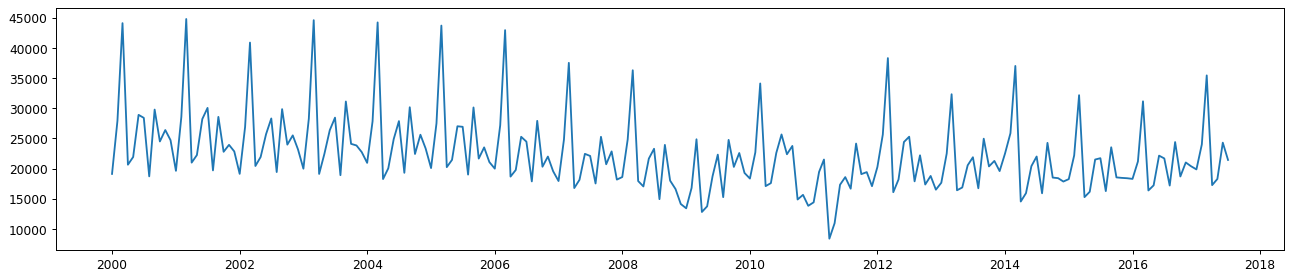

In [0]:
x=dt.loc[:,'Items']
plt.figure(figsize=(18,8),dpi=88)
plt.subplot(211)
plt.plot(x,A)
#pyplot.plot(figsize=(19,8) )
#plt.plot(x,A)
#plt.show()

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:

dt.shape

(211, 272)

In [0]:
A.shape

# print(type(dt))

(211,)

In [0]:

dt.dropna(axis=1, how='all', inplace=True)
dt.dropna(axis=0, how='all', inplace=True)
dt.shape

(211, 272)

In [0]:
dt.head()

,Unnamed: 0,Items,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,total mean,industrial product,food and drink,textile goods,Wood and wood products,"Pulp, paper and paper products",chemical products,petroleum and coal products,plastic product,Ceramics and stone products,Steel,nonferrous metal,Metal Products,general purpose equipment,production equipment,business equipment,electronic components and devices,electrical equipment,information and communication equipment,transportation equipment,Other industrial products,"agricultural, forestry and fishery products",...,software development,Information processing and provision services,Newspapers and Publications,newspaper,publishing,lease and rental,Leasing,Rental,advertising,television advertising,newspaper advertisement,magazine advertising,insert advertisement,Internet advertising,Other Advertisements,services,Sewage and waste treatment,sewerage,waste disposal,automobile maintenance and machine repair,automobile maintenance,machine repair,Professional Services,Legal and accounting services,Other Specialized Services,technical service,civil engineering and construction services,Employment placement and worker dispatch services,Worker Dispatch Service,Other Services,Building Services,guard,Laundry,Freight Transportation JR Freight Company (Container),Cargo transportation Air cargo export value,Cargo transportation Air cargo import value,Passenger transport Airlines Domestic flights,Passenger transport Airlines International,Passenger transport,Passenger transport Number of visitors to Japan
0,0,2000-01-01,19110,12004,19689,14593,1511,7147,5376,123,322,9732,5399,17506,24420,2329,4193,356,97.5,99.5,86.9,86.2,83.0,86.6,92.0,51.2,94.0,89.9,65.9,56.7,83.4,92.1,100.1,113.9,212.1,123.9,379.3,107.9,101.8,96.9,...,108.9,107.1,96.6,98.5,95.7,183.0,196.2,134.3,106.3,87.4,135.1,116.0,102.7,157.5,107.0,106.0,85.2,88.0,84.3,103.8,109.2,100.8,99.8,97.5,105.3,124.7,127.9,101.2,101.2,114.6,121.2,107.7,104.4,1446,1169.072,853.813,6667,1430,1229,336
1,1,2000-02-01,27910,16816,28629,20125,2030,10953,7079,216,509,13420,7113,23355,31667,3274,5511,478,97.5,99.4,87.0,87.1,83.1,86.5,92.0,51.3,93.9,89.8,66.0,57.1,83.3,92.0,100.0,113.9,210.9,123.4,376.3,107.9,101.8,99.4,...,110.4,107.1,96.6,98.5,95.7,181.7,194.6,133.9,109.4,95.5,135.5,116.9,102.7,157.5,107.0,106.0,85.3,89.3,84.1,103.7,109.1,100.8,99.8,97.5,105.3,124.7,127.9,101.1,101.1,114.6,121.2,107.7,104.4,1630,1342.621,892.863,7313,1519,1414,361
2,2,2000-03-01,44100,26780,44514,29506,5041,16916,11095,507,1556,19675,11151,36606,54533,4603,8415,896,97.4,99.3,86.9,87.4,83.1,86.5,91.9,52.4,93.9,89.7,66.0,56.4,83.1,91.8,99.9,113.9,209.9,123.5,371.5,107.9,101.7,99.4,...,110.3,107.1,96.6,98.5,95.7,179.8,191.9,134.6,117.1,116.4,136.8,118.2,102.7,157.5,106.8,105.9,85.3,89.3,84.1,103.5,108.4,100.8,99.8,97.5,105.3,124.7,127.9,100.6,100.6,114.6,121.2,107.7,104.3,1904,1488.205,1114.334,8460,1653,1574,366
3,3,2000-04-01,20635,13401,20901,16196,1285,7875,6211,172,576,10801,6341,22435,30707,3509,5598,1054,97.2,99.0,87.0,87.0,82.9,86.8,91.4,53.4,92.2,89.6,66.1,55.9,83.1,91.6,99.9,113.8,209.4,123.3,366.8,107.3,101.7,98.4,...,110.0,106.6,96.7,98.5,95.9,179.4,191.5,134.9,117.1,116.8,136.6,117.4,102.7,157.5,106.8,104.9,86.1,92.0,84.2,102.7,108.4,99.6,99.8,97.7,105.2,118.6,121.7,100.6,100.6,114.0,120.2,107.7,104.2,1599,1477.985,917.689,6837,1527,1305,443
4,4,2000-05-01,21912,12940,21630,15082,1975,9341,6187,92,426,10058,6299,21934,29228,3475,5460,690,97.0,98.8,86.9,86.6,82.5,87.3,91.4,52.4,92.2,89.6,66.0,56.7,83.2,91.3,99.9,113.3,207.0,123.0,361.8,107.1,101.6,97.3,...,109.9,106.6,96.7,98.5,95.9,177.2,188.6,135.2,114.8,111.2,134.6,117.5,102.7,157.5,106.8,104.9,86.1,92.0,84.1,102.6,108.2,99.6,99.7,97.7,105.1,118.6,121.7,101.8,101.8,113.9,120.0,107.7,104.2,1489,1326.394,1010.791,7374,1581,1370,381


In [0]:
sella2p=dt.iloc[:,2:18]
sella2p.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,19110,12004,19689,14593,1511,7147,5376,123,322,9732,5399,17506,24420,2329,4193,356
1,27910,16816,28629,20125,2030,10953,7079,216,509,13420,7113,23355,31667,3274,5511,478
2,44100,26780,44514,29506,5041,16916,11095,507,1556,19675,11151,36606,54533,4603,8415,896
3,20635,13401,20901,16196,1285,7875,6211,172,576,10801,6341,22435,30707,3509,5598,1054
4,21912,12940,21630,15082,1975,9341,6187,92,426,10058,6299,21934,29228,3475,5460,690


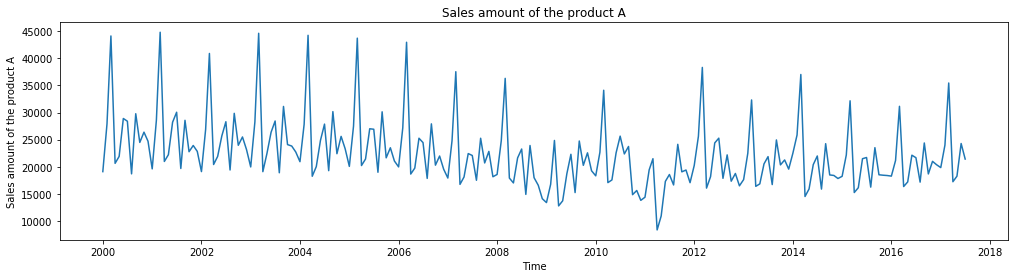

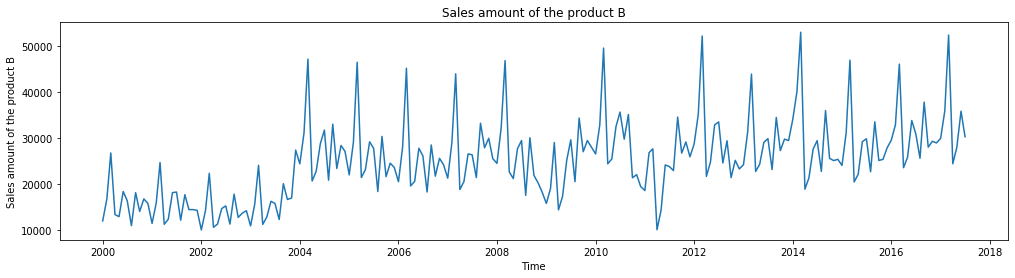

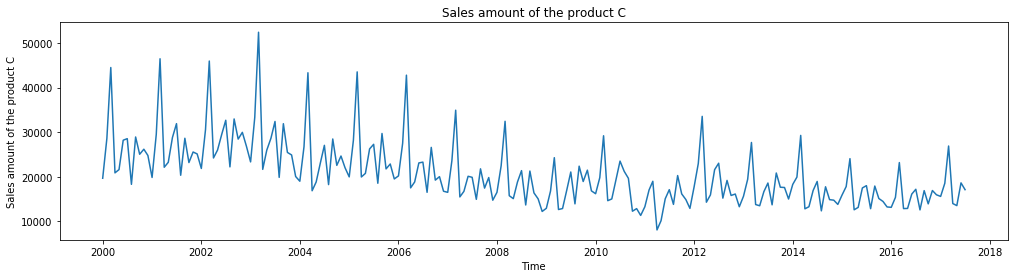

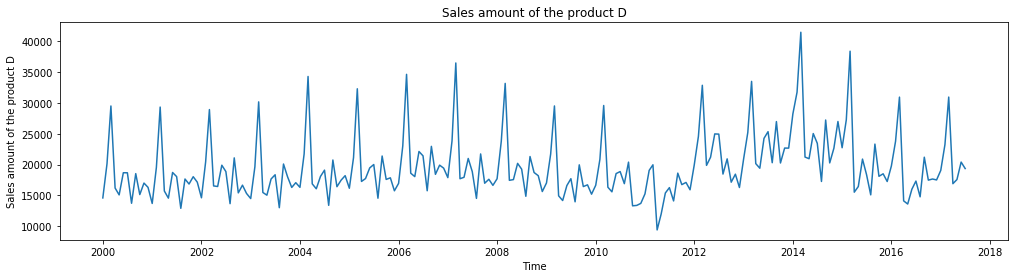

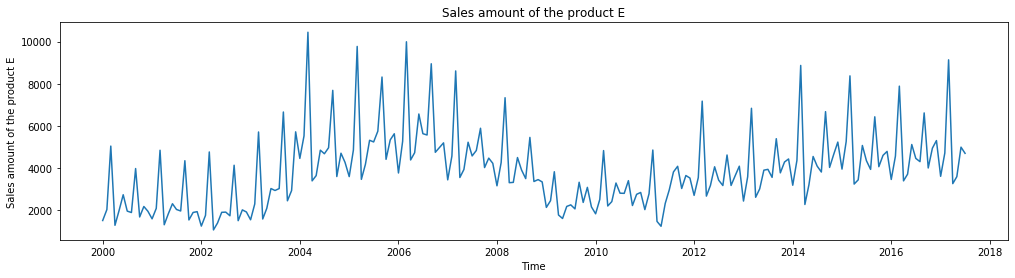

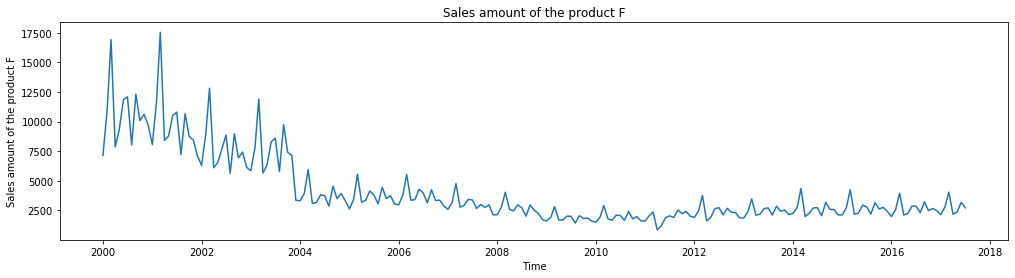

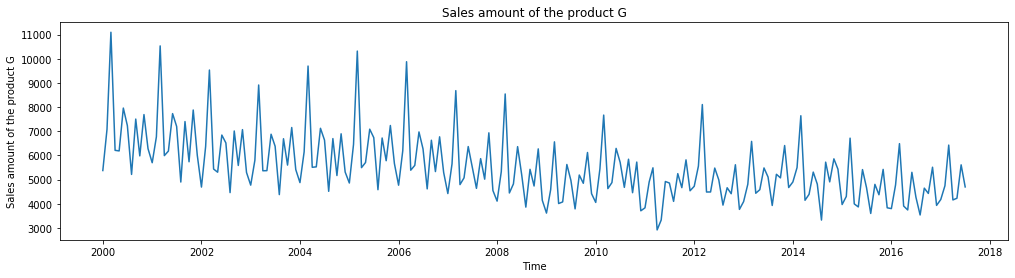

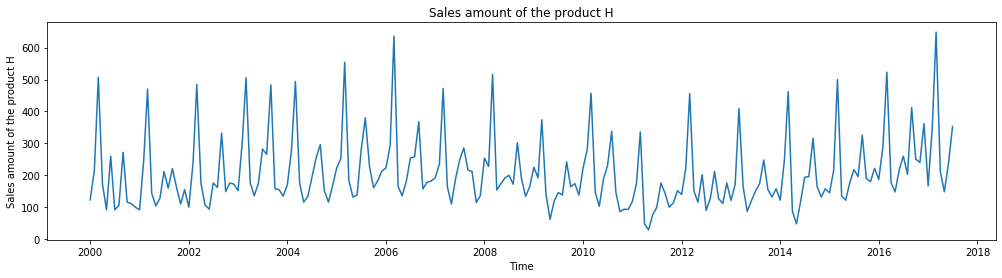

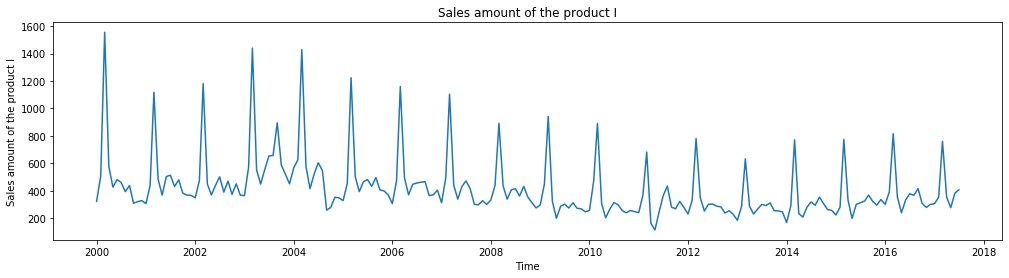

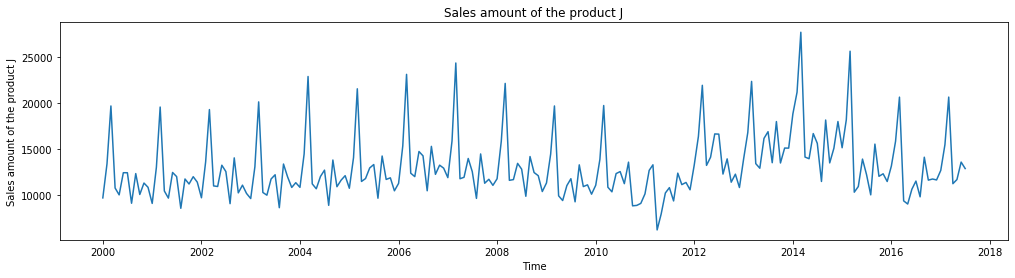

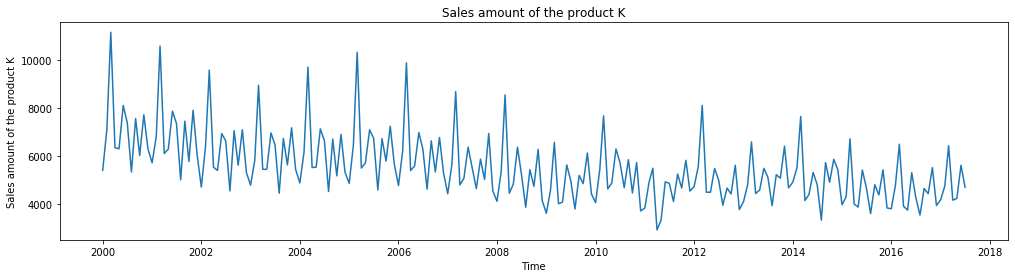

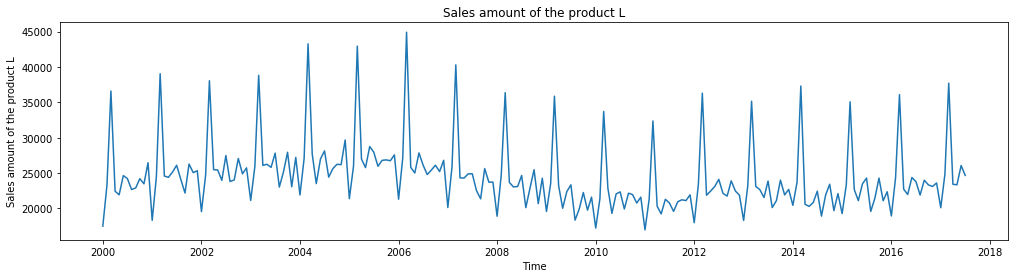

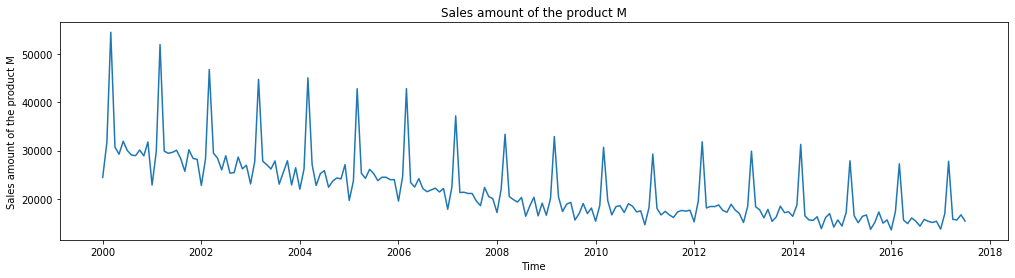

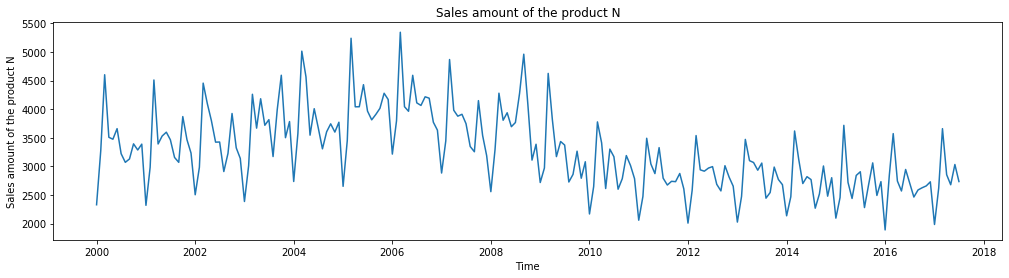

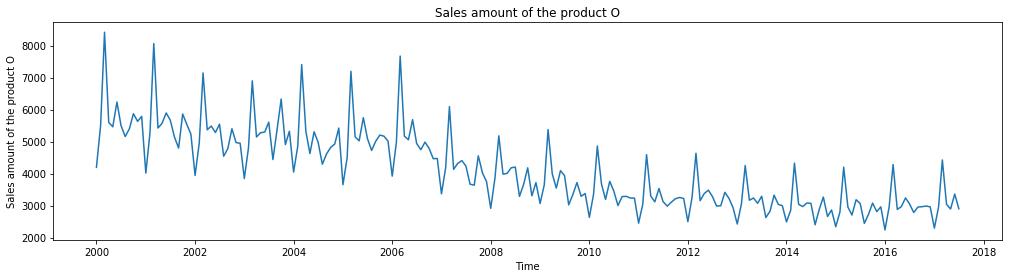

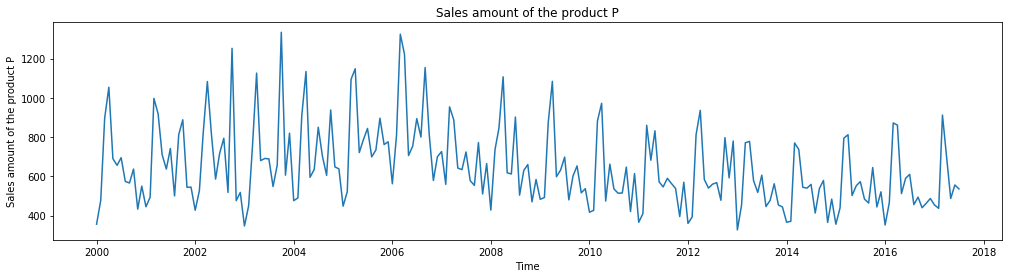

In [0]:
for i in range(len(sella2p.columns)):

    plt.figure(figsize=(17, 4))
    plt.plot(x,sella2p.iloc[:,i])
    plt.xlabel('Time')
    plt.ylabel("Sales amount of the product %s"%(sella2p.columns[i]))
    plt.title("Sales amount of the product %s"%str(sella2p.columns[i]))
    plt.grid(False)
    plt.show()


In [0]:

from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [0]:
dt_to_forcast=dt[['Items','A']]


dt_to_forcast.head()

,Items,A
0,2000-01-01,19110
1,2000-02-01,27910
2,2000-03-01,44100
3,2000-04-01,20635
4,2000-05-01,21912


In [0]:
dt_to_forcast.columns = ['ds', 'y']
dt_to_forcast.head()

,ds,y
0,2000-01-01,19110
1,2000-02-01,27910
2,2000-03-01,44100
3,2000-04-01,20635
4,2000-05-01,21912


In [0]:

# Python
m = Prophet()
m.fit(dt_to_forcast)

In [0]:

df2=dt_to_forcast
prediction_size = 30
train_df = df2[:-prediction_size]
train_df.tail()

,ds,y
176,2014-09-01,24256
177,2014-10-01,18501
178,2014-11-01,18401
179,2014-12-01,17843
180,2015-01-01,18244


In [0]:
future = m.make_future_dataframe(periods=prediction_size)

forecast = m.predict(future)

In [0]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
236,2017-07-27,23255.688625,20604.664850,26262.010694
237,2017-07-28,21880.511509,19178.077532,24773.519820
238,2017-07-29,20495.401680,17728.070580,23458.494367
239,2017-07-30,19125.694153,16126.511333,22143.522854
240,2017-07-31,17796.811647,14868.735045,20825.173430


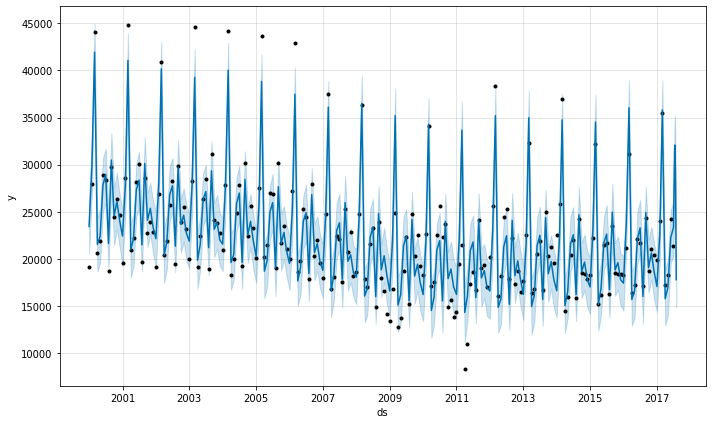

In [0]:
# Python
fig1 = m.plot(forecast)

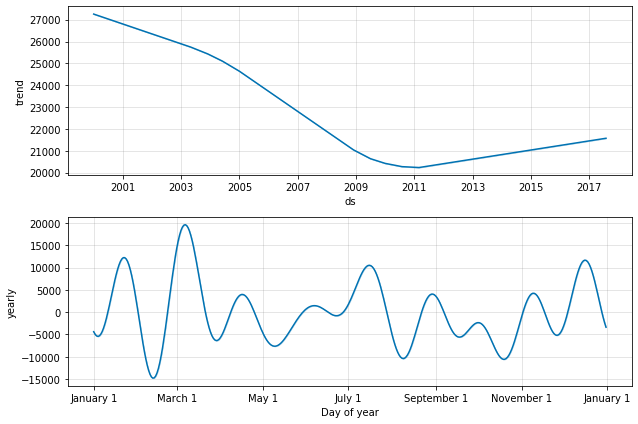

In [0]:

# https://facebook.github.io/prophet/docs/quick_start.html
# 
# Python
fig2 = m.plot_components(forecast)


In [10]:


l=['ee','eer',[23,223,32],'332']
l[2][1]

223